# Logistic Reression


##### Linear Regression같은 경우 numeric variable(수치형 변수)을 종속변수로 두고 분석했다면,
##### Logisic Regression같은 경우 cartegorical variable(범주형 변수)이면서 0,1로 구성된 종속변수인 경우 분석

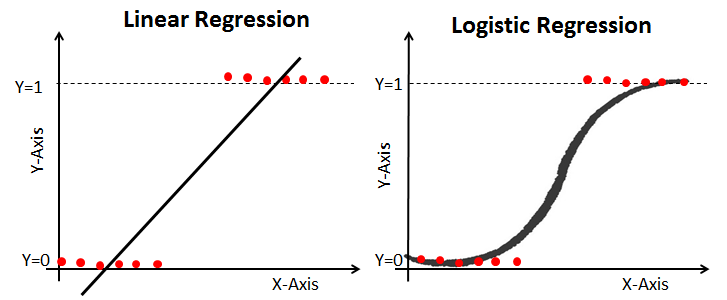

### 기본 tool

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Directory 설정

In [2]:
import os
os.chdir(r'C:/Users/User/Desktop')
os.getcwd()

'C:\\Users\\User\\Desktop'

### Data1: 사람의 키로 남/여 성별을 예측 

In [3]:
# 남여 총 100개의 data #
body_data = pd.read_csv(r"./data/height_gender.txt", sep='\t', names=['height', 'gender'])
body_data

,height,gender
0,149.4,woman
1,169.6,man
2,169.6,man
3,172.5,man
4,178.9,man
...,...,...
95,164.0,man
96,159.9,woman
97,171.4,man
98,171.5,woman


In [4]:
# Data Factorize: woman:0 man:1
X = body_data[['height']]
y = body_data['gender']

y,class_names=pd.factorize(y)

print(y)
print(class_names)

[0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1]
Index(['woman', 'man'], dtype='object')


In [5]:
# 로지스틱 리그레이션 #
from sklearn.linear_model import LogisticRegression

In [6]:
# solver: 최적화에 사용할 알고리즘('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')

b_logreg = LogisticRegression(solver='lbfgs')

In [7]:
b_logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# class: binary 
b_logreg.classes_

array([0, 1], dtype=int64)

In [9]:
b_logreg.intercept_

array([-61.84911788])

In [10]:
b_logreg.coef_

array([[0.37475973]])

### logistic_funtion 간단 설명

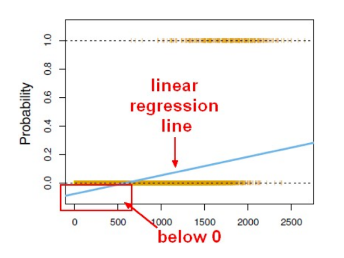

In [11]:
Image("img/wrong_linear.png",  width=300, height=300)

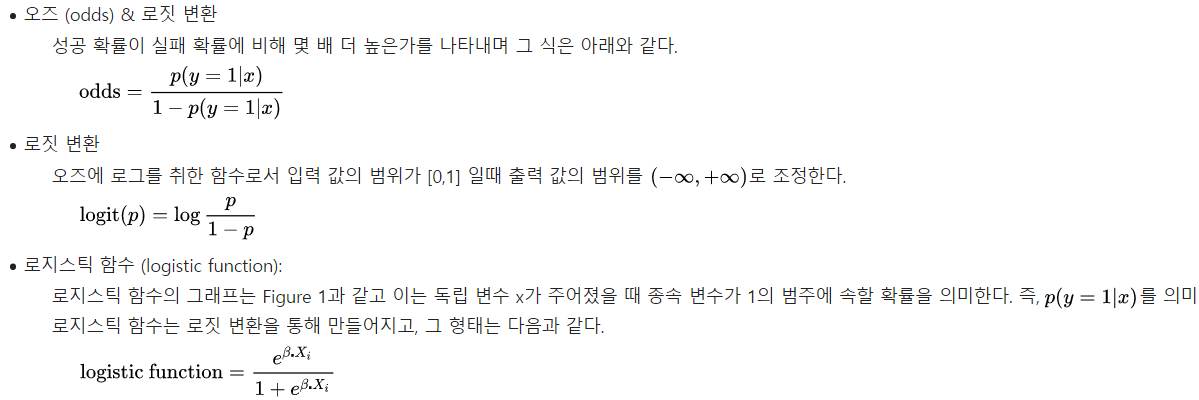

In [12]:
Image("img/logistic_funtion.png",  width=1000, height=1000)

## logistic_funtion (독립변수가 한 개일 때)
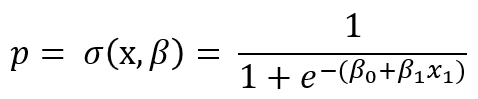
> 로지스틱 함수 유도 중간부분 참조: https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80

In [13]:
# data 한개만 넣었을 때 확률 보기 #
single_man_t1 = 1 / (1 + np.exp(-(b_logreg.intercept_ + b_logreg.coef_ * 170)))

single_man_t2 = np.exp((b_logreg.intercept_ + b_logreg.coef_ * 170)) / (1 + np.exp((b_logreg.intercept_ + b_logreg.coef_ * 170)))

print(single_man_t1, single_man_t2)

[[0.86530115]] [[0.86530115]]


In [14]:
# model 구현 #
# set_printoptions: 부동 소수점(예시: 2^n승) 숫자, 배열 및 기타 NumPy 객체가 표시되는 방식을 결정 
np.set_printoptions(suppress=True, precision=True)

# man일 확률 / woman일 확률 #
y_prob = b_logreg.predict_proba(X)
y_prob

array([[1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.1, 0.9],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.9, 0.1],
       [0. , 1. ],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0. , 1. ],
       [0.1, 0.9],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.1, 0.9],
       [1. ,

In [15]:
# numpy 구현 #
zero_class_prob = 1 - 1/(1+np.exp(-(b_logreg.intercept_ + b_logreg.coef_ * X.values)))
one_class_prob = 1/(1+np.exp(-(b_logreg.intercept_ + b_logreg.coef_ * X.values)))

n_prob = np.c_[zero_class_prob, one_class_prob]
n_prob

array([[1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.1, 0.9],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.9, 0.1],
       [0. , 1. ],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0. , 1. ],
       [0.1, 0.9],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.1, 0.9],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.1, 0.9],
       [1. ,

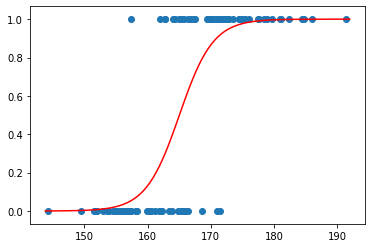

In [16]:
# logstic line plot #
line = np.linspace(min(X.values)-0.5, max(X.values)+0.5, 100)
plt.plot(line,b_logreg.predict_proba(line.reshape(-1,1))[:,1], color= 'r')
plt.scatter(X, y)
plt.show()

In [17]:
# decision boundary # y=0과 y=1을 가르는 경계선
decision_boundary = line[b_logreg.predict_proba(line.reshape(-1,1))[:,1]>=0.5][0]
decision_boundary

array([165.2])

In [18]:
# height 수치를 통해 gender를 예측 #
y_pred=b_logreg.predict(X)
y_pred=list(y_pred)
print(y_pred)

[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]


In [19]:
# 성능 #
b_logreg.score(X,y)

0.84

### Data2: Titanic data(주어진 feature들로 생존자 예측)

In [20]:
# 타이타닉 데이터 불러오기 #
titanic = pd.read_csv(r"./data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


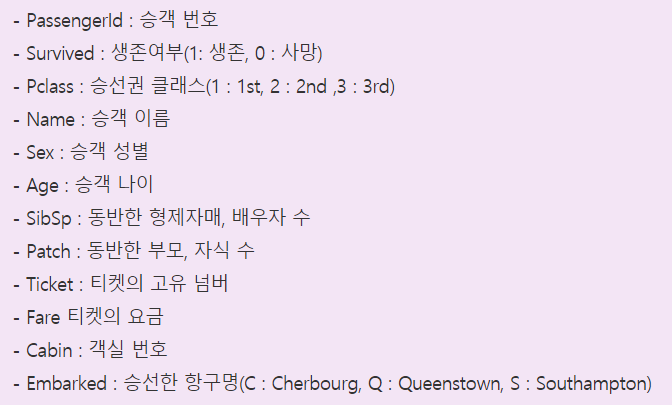

In [21]:
# Titanic 간단 설명 #
Image("img/titanic_feature.png",  width=500, height=500)

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1. Feature Engineering
>  데이터에 대한 도메인 지식을 사용하여 머신러닝 알고리즘을 작동시키는 Feature(Feature vectors)를 만드는 과정

In [23]:
# column별 결측치 확인 # 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 호칭

In [24]:
# Name -> Mr., Miss., Mrs.,...etc
analy_data = [titanic]

for dataset in analy_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
    
dataset['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [25]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Countess      1
Capt          1
Mme           1
Lady          1
Don           1
Sir           1
Jonkheer      1
Name: Title, dtype: int64

In [26]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

titanic['Title'] = dataset['Title'].map(title_mapping)

In [27]:
titanic['Title']

0      0
1      2
2      1
3      2
4      0
      ..
886    3
887    1
888    1
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [28]:
# Data Visualization #
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

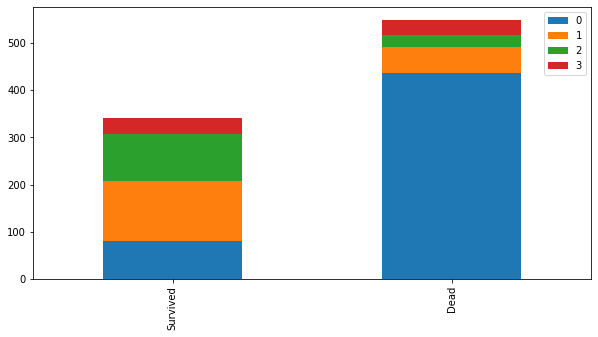

In [29]:
# Mr., Miss., Mrs.,...etc 생존 그래프 #
bar_chart('Title')

##### 성별

In [30]:
# 문자열을 숫자로 변환: 성별에 대한 데이터(str -> int) #
titanic['Sex'] = titanic['Sex'].map({'female':0,'male':1})

titanic['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

##### 나이

In [31]:
titanic['Age'].isnull().sum()

177

In [32]:
#  결측치 채워주기: Age column 중 data가 Nan값으로 비어있는 경우, 평균 값으로 대체해서 채우기 #
titanic['Age'].fillna(value=titanic['Age'].median(), inplace=True)

titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [33]:
titanic['Age'].isnull().sum()

0

##### 승선 항구명
> C: Cherbourg(셰르부그), Q: Queenstown(퀸즈타운), S: Southampton(사우스햄튼)

In [34]:
titanic['Embarked'].isnull().sum()

2

In [35]:
# 결측치 채워주기: Embarked columns 중 data를 임의로 'S'로 채우기 #
titanic['Embarked'] = titanic['Embarked'].fillna('S')

# str -> int #
embarked_mapping = {'S':0, 'C':1, 'Q':2}
titanic['Embarked'] = titanic['Embarked'].map(embarked_mapping)
titanic['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [36]:
titanic['Embarked'].isnull().sum()

0

#### Cabin
> 객실 번호 

In [37]:
titanic['Cabin'].isnull().sum()

687

In [38]:
# Cabin data 형태보기#
titanic.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
E101           3
              ..
A24            1
E17            1
E40            1
B69            1
D50            1
Name: Cabin, Length: 147, dtype: int64

In [39]:
# Cabin data의 앞자만 따오기 #
titanic['Cabin'] = titanic['Cabin'].str[:1]

# feature scaling # 1등급에는 ABCDET, 2등급에는 DEF, 3등급은 EFG로 구성
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
titanic['Cabin'] = titanic['Cabin'].map(cabin_mapping)

# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계가 있기 때문에 각 클래스별 cabin의 중간값을 missing value에 넣음.
titanic['Cabin'].fillna(titanic.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
titanic['Cabin']

0      2.0
1      0.8
2      2.0
3      0.8
4      2.0
      ... 
886    1.8
887    0.4
888    2.0
889    0.8
890    2.0
Name: Cabin, Length: 891, dtype: float64

In [40]:
# 결측치 다시 확인 # 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [41]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,1.8,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0.4,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2.0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0.8,1,0


### 2.2 feature 선별 및 Data split

sibsp: 동반 형제자매, 배우자수
Parch: 동반한 부모자식수

In [43]:
# feature 결합 # 
# 혼자 탔는지, 함께 탔는지 구별하기 위해 SibSb 데이터와 Parch 데이터를 합쳐 하나의 값을 만듦 #
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# data scaling 및 변환 #
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
titanic['FamilySize'] = titanic['FamilySize'].map(family_mapping)
titanic['FamilySize']

0      0.4
1      0.4
2      0.0
3      0.4
4      0.0
      ... 
886    0.0
887    0.0
888    1.2
889    0.0
890    0.0
Name: FamilySize, Length: 891, dtype: float64

In [44]:
# feature 선별 #
features_drop = ['PassengerId','Name','Ticket', 'SibSp', 'Parch']
titanic = titanic.drop(features_drop, axis=1)
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,22.0,7.2500,2.0,0,0,0.4
1,1,1,0,38.0,71.2833,0.8,1,2,0.4
2,1,3,0,26.0,7.9250,2.0,0,1,0.0
3,1,1,0,35.0,53.1000,0.8,0,2,0.4
4,0,3,1,35.0,8.0500,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1.8,0,3,0.0
887,1,1,0,19.0,30.0000,0.4,0,1,0.0
888,0,3,0,28.0,23.4500,2.0,0,1,1.2
889,1,1,1,26.0,30.0000,0.8,1,0,0.0


In [45]:
# Data split #
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
140,3,0,28.0,15.2458,2.0,1,2,0.8
439,2,1,31.0,10.5000,1.8,0,0,0.0
817,2,1,31.0,37.0042,1.8,1,0,0.8
378,3,1,20.0,4.0125,2.0,1,0,0.0
491,3,1,21.0,7.2500,2.0,0,0,0.0


### 2.3 Metric 측정

In [46]:
t_logreg = LogisticRegression(solver='newton-cg')

In [47]:
t_logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
t_logreg.coef_

array([[-1.1, -1.9, -0. ,  0. ,  0.3,  0.2,  0.8, -1. ]])

In [49]:
t_logreg.intercept_

array([3.3])

## logistic_funtion (독립변수가 여러 개일 때)

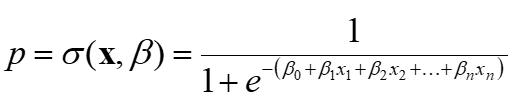

In [50]:
y_prob = t_logreg.predict_proba(X_train)
y_prob = np.round_(y_prob, 3)
y_prob

array([[0.3, 0.7],
       [0.8, 0.2],
       [0.9, 0.1],
       ...,
       [0.9, 0.1],
       [0.4, 0.6],
       [1. , 0. ]])

In [51]:
# train 성능 #
t_logreg.score(X_train, y_train)

0.824438202247191

In [52]:
y_prob_ = t_logreg.predict_proba(X_test)
y_prob_ = np.round_(y_prob_, 3)
y_prob_

array([[0.9, 0.1],
       [0.9, 0.1],
       [0.6, 0.4],
       [0. , 1. ],
       [0.3, 0.7],
       [0.6, 0.4],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.7, 0.3],
       [0. , 1. ],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.5, 0.5],
       [0.2,

In [53]:
y_pred=t_logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [54]:
# test 성능 #
t_logreg.score(X_test,y_test)

0.7932960893854749

In [55]:
# 나의 생존률 예측 #

# 등급 #
Pclass = 2
# 성별 #
Sex = 1
# 나이 #
Age = 28
# 운임료 #
Fare = 21
# 선실번호 #
Carbin = 2.0
# 탑승장소: queenstown #
Embarked = 2
# 호칭 #
Title = 0
# 가족수 #
FamilySize = 1.2

ME = np.array([Pclass, Sex, Age, Fare, Carbin, Embarked, Title, FamilySize])

sample_passenger  = np.array([ME])
sample_passenger

array([[ 2. ,  1. , 28. , 21. ,  2. ,  2. ,  0. ,  1.2]])

In [56]:
titanic.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [57]:
m_prob = t_logreg.predict_proba(sample_passenger)[0][1]

import math
print(f'내생존확률: {math.ceil(m_prob*100)}%')

내생존확률: 13%
